In [1]:
# !pip install numpy pandas matplotlib seaborn scikit-learn statsmodels shap

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
no_gas_compo_data = pd.read_excel('Dataset/Dikshit_data.xlsx')
data = no_gas_compo_data.copy()

In [3]:
#drop row where NO. == NaN
data = data.dropna(subset=['NO.'])

In [4]:
#removing empty rows
data = data.dropna(how='all')
data

,NO.,Mc,Cc,Hc,Nc,Sc,Oc,Ashc,Vc,FCc,T,HR,HTT,GAS,OIL,CHAR
1,1.0,2.26,75.375,10.98,2.1,1.795,22.775,1.855,85.675,10.215,45,10,540,18.4,67.1,14.5
2,2.0,0,79.4,14.1,1.9,2.5,2.1,0,100,0,45,10,540,15.4,82.6,2
3,3.0,2.26,74.175,10.03,2.1,1.645,25.075,1.855,85.675,10.215,45,10,540,25.9,59.8,14.3
4,4.0,0,77,12.2,1.9,2.2,6.7,0,100,0,45,10,540,21.6,75.3,3.1
5,5.0,3.755,76.36,10.42,2.1,1.8,26.43,2.53,86.66,7.055,45,10,540,19.9,65,15.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,248.0,0.5,91.5,8.5,0,0,0,0,99.5,0,20,25,525,0.5,99.5,0
249,249.0,3.075,91.63,8.22,1.37,0.125,16.6,0.745,95.63,0.55,20,25,525,12.84,71.74,15.42
250,250.0,3.9505,91.6742,8.1248,1.8358,0.1675,22.244,0.9983,94.3142,0.737,20,25,525,15.53,67.52,16.95
251,251.0,4.62,91.708,8.052,2.192,0.2,26.56,1.192,93.308,0.88,20,25,525,19.66,59.28,21.06


In [5]:
data.columns

Index(['NO.', 'Mc', 'Cc', 'Hc', 'Nc', 'Sc', 'Oc', 'Ashc', 'Vc', 'FCc', 'T',
       'HR', 'HTT', 'GAS', 'OIL', 'CHAR'],
      dtype='object')

In [6]:
data.drop(columns=['NO.'], axis=1, inplace=True)

In [7]:
data.columns

Index(['Mc', 'Cc', 'Hc', 'Nc', 'Sc', 'Oc', 'Ashc', 'Vc', 'FCc', 'T', 'HR',
       'HTT', 'GAS', 'OIL', 'CHAR'],
      dtype='object')

In [8]:
#predictive_columns are the columns that we will use to predict the target variable i.e. GAS', 'OIL', 'CHAR', 'CO', 'CO2', 'H2','CH4'
predictive_columns = ['GAS', 'OIL', 'CHAR']
X = data.drop(columns=predictive_columns)

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 1 to 252
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mc      252 non-null    object
 1   Cc      252 non-null    object
 2   Hc      252 non-null    object
 3   Nc      252 non-null    object
 4   Sc      252 non-null    object
 5   Oc      252 non-null    object
 6   Ashc    252 non-null    object
 7   Vc      252 non-null    object
 8   FCc     252 non-null    object
 9   T       252 non-null    object
 10  HR      252 non-null    object
 11  HTT     252 non-null    object
dtypes: object(12)
memory usage: 25.6+ KB


In [10]:
#converting all columns to numeric
X = X.apply(pd.to_numeric, errors='coerce')
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 1 to 252
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mc      252 non-null    float64
 1   Cc      252 non-null    float64
 2   Hc      252 non-null    float64
 3   Nc      252 non-null    float64
 4   Sc      252 non-null    float64
 5   Oc      252 non-null    float64
 6   Ashc    252 non-null    float64
 7   Vc      252 non-null    float64
 8   FCc     252 non-null    float64
 9   T       252 non-null    float64
 10  HR      252 non-null    int64  
 11  HTT     252 non-null    int64  
dtypes: float64(10), int64(2)
memory usage: 25.6 KB


In [11]:
#normalisation of data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mc      252 non-null    float64
 1   Cc      252 non-null    float64
 2   Hc      252 non-null    float64
 3   Nc      252 non-null    float64
 4   Sc      252 non-null    float64
 5   Oc      252 non-null    float64
 6   Ashc    252 non-null    float64
 7   Vc      252 non-null    float64
 8   FCc     252 non-null    float64
 9   T       252 non-null    float64
 10  HR      252 non-null    float64
 11  HTT     252 non-null    float64
dtypes: float64(12)
memory usage: 23.8 KB


In [12]:
y = data['GAS']

In [13]:
y = y.apply(pd.to_numeric, errors='coerce')
y.info()

<class 'pandas.core.series.Series'>
Index: 252 entries, 1 to 252
Series name: GAS
Non-Null Count  Dtype  
--------------  -----  
252 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


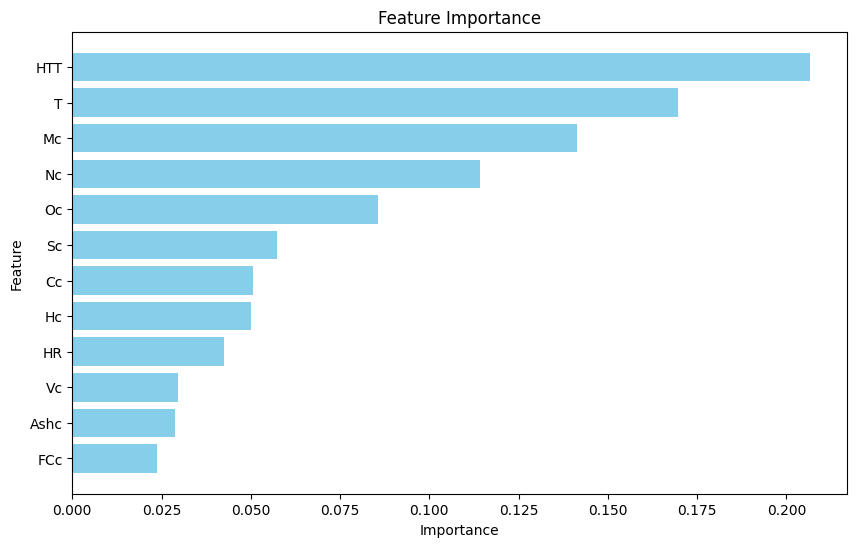

In [14]:
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt

# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_scaled, y)

# Get feature importances
importances = model.feature_importances_
feature_names = X_scaled.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

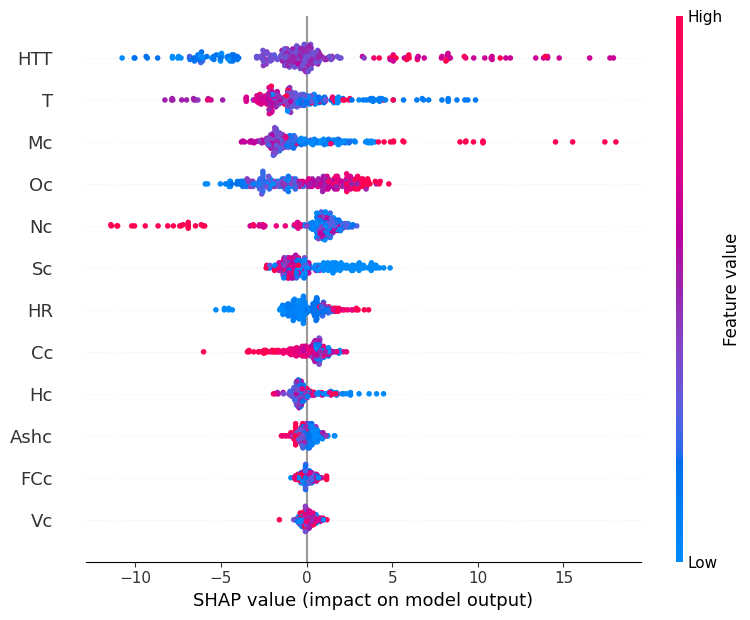

In [15]:
import shap

# Initialize the SHAP explainer
explainer = shap.TreeExplainer(model)

# Calculate SHAP values
shap_values = explainer.shap_values(X_scaled)

# Summary plot of SHAP values
shap.summary_plot(shap_values, X_scaled, feature_names=feature_names)


In [16]:
#Starting with Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 130.16670619556473
R^2 Score: 0.4191509225250274


In [17]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize models
models = {
    "SVM": SVR(),
    "KNN": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Ada Boost": AdaBoostRegressor(random_state=42),
    "Grad Boost": GradientBoostingRegressor(random_state=42),
    "XG Boost": XGBRegressor(random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R^2": r2}
    print(f"{name} - Mean Squared Error: {mse}, R^2 Score: {r2}")

SVM - Mean Squared Error: 178.1643634482399, R^2 Score: 0.20496869612460045
KNN - Mean Squared Error: 94.87849733333334, R^2 Score: 0.5766191735275228
Decision Tree - Mean Squared Error: 147.5118411764706, R^2 Score: 0.3417509026059451
Random Forest - Mean Squared Error: 60.78285914293687, R^2 Score: 0.7287657597602398
Ada Boost - Mean Squared Error: 96.78422525715632, R^2 Score: 0.5681151532690107
Grad Boost - Mean Squared Error: 56.76214230636253, R^2 Score: 0.7467075955304675
XG Boost - Mean Squared Error: 73.51494027491059, R^2 Score: 0.6719507892044632


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score

# Define the deep ANN model
model_ann = Sequential([
    Dense(256, input_dim=X_train.shape[1], activation='LeakyReLU'),
    # Dense(128, activation='LeakyReLU'),
    # Dense(64, activation='LeakyReLU'),
    Dense(1, activation='linear')  # Output layer
])

# Compile the model
model_ann.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mse'])

# Train the model
history = model_ann.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=16, verbose=1)

# Predict on the test set
y_pred_ann = model_ann.predict(X_test)

# Evaluate the model
mse_ann = mean_squared_error(y_test, y_pred_ann)
r2_ann = r2_score(y_test, y_pred_ann)

print(f"Shallow ANN - Mean Squared Error: {mse_ann}")
print(f"Shallow ANN - R^2 Score: {r2_ann}")

2025-12-23 09:37:30.747993: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-12-23 09:37:30.748020: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-12-23 09:37:30.748026: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-12-23 09:37:30.748336: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-12-23 09:37:30.748744: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/1000


2025-12-23 09:37:31.207483: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2025-12-23 09:37:31.232294: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


13/13 [==============================] - 1s 48ms/step - loss: 949.3947 - mse: 949.3947 - val_loss: 919.5198 - val_mse: 919.5198
Epoch 2/1000
13/13 [==============================] - 0s 8ms/step - loss: 916.1556 - mse: 916.1556 - val_loss: 890.8462 - val_mse: 890.8462
Epoch 3/1000
13/13 [==============================] - 0s 7ms/step - loss: 883.6752 - mse: 883.6752 - val_loss: 862.2682 - val_mse: 862.2682
Epoch 4/1000
13/13 [==============================] - 0s 7ms/step - loss: 848.9207 - mse: 848.9207 - val_loss: 831.8289 - val_mse: 831.8289
Epoch 5/1000
13/13 [==============================] - 0s 8ms/step - loss: 811.1832 - mse: 811.1832 - val_loss: 797.6052 - val_mse: 797.6052
Epoch 6/1000
13/13 [==============================] - 0s 9ms/step - loss: 768.8944 - mse: 768.8944 - val_loss: 760.0673 - val_mse: 760.0673
Epoch 7/1000
13/13 [==============================] - 0s 11ms/step - loss: 721.7829 - mse: 721.7829 - val_loss: 717.8183 - val_mse: 717.8183
Epoch 8/1000
13/13 [===========

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.metrics import mean_squared_error, r2_score

# Define the deep ANN model
model_ann = Sequential([
    Dense(256, input_dim=X_train.shape[1], activation='LeakyReLU'),
    # Dense(128, activation='LeakyReLU'),
    # Dense(64, activation='LeakyReLU'),
    Dense(1, activation='linear')  # Output layer
])

# Compile the model
model_ann.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mse'])

# Train the model
history = model_ann.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=16, verbose=1)

# Predict on the test set
y_pred_ann = model_ann.predict(X_test)

# Evaluate the model
mse_ann = mean_squared_error(y_test, y_pred_ann)
r2_ann = r2_score(y_test, y_pred_ann)

print(f"Shallow ANN - Mean Squared Error: {mse_ann}")
print(f"Shallow ANN - R^2 Score: {r2_ann}")

Epoch 1/1000
13/13 [==============================] - 0s 15ms/step - loss: 948.4961 - mse: 948.4961 - val_loss: 917.4877 - val_mse: 917.4877
Epoch 2/1000
13/13 [==============================] - 0s 6ms/step - loss: 916.4360 - mse: 916.4360 - val_loss: 890.1944 - val_mse: 890.1944
Epoch 3/1000
13/13 [==============================] - 0s 6ms/step - loss: 883.9469 - mse: 883.9469 - val_loss: 861.4066 - val_mse: 861.4066
Epoch 4/1000
13/13 [==============================] - 0s 6ms/step - loss: 848.2290 - mse: 848.2290 - val_loss: 829.2292 - val_mse: 829.2292
Epoch 5/1000
13/13 [==============================] - 0s 7ms/step - loss: 807.6881 - mse: 807.6881 - val_loss: 793.4583 - val_mse: 793.4583
Epoch 6/1000
13/13 [==============================] - 0s 7ms/step - loss: 763.1520 - mse: 763.1520 - val_loss: 753.2603 - val_mse: 753.2603
Epoch 7/1000
13/13 [==============================] - 0s 7ms/step - loss: 711.5477 - mse: 711.5477 - val_loss: 709.1345 - val_mse: 709.1345
Epoch 8/1000
13/13 

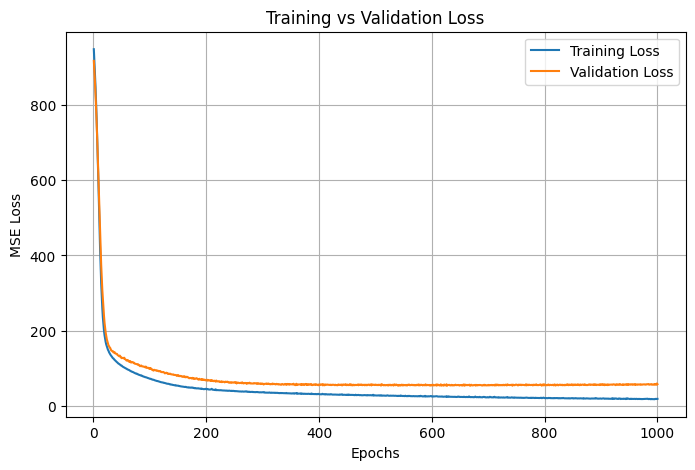

In [20]:
import matplotlib.pyplot as plt

# Extract loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


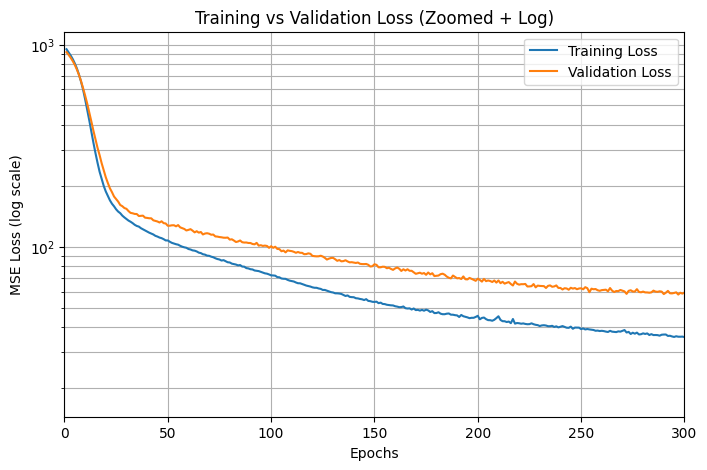

In [21]:
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')

plt.xlim(0, 300)
plt.yscale('log')

plt.xlabel('Epochs')
plt.ylabel('MSE Loss (log scale)')
plt.title('Training vs Validation Loss (Zoomed + Log)')
plt.legend()
plt.grid(True, which="both")
plt.show()


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score

# Define the deep ANN model
model_ann = Sequential([
    Dense(512, input_dim=X_train.shape[1], activation='LeakyReLU'),
    # Dense(128, activation='LeakyReLU'),
    # Dense(64, activation='LeakyReLU'),
    Dense(1, activation='linear')  # Output layer
])

# Compile the model
model_ann.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mse'])

# Train the model
history = model_ann.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=16, verbose=1)

# Predict on the test set
y_pred_ann = model_ann.predict(X_test)

# Evaluate the model
mse_ann = mean_squared_error(y_test, y_pred_ann)
r2_ann = r2_score(y_test, y_pred_ann)

print(f"Shallow ANN - Mean Squared Error: {mse_ann}")
print(f"Shallow ANN - R^2 Score: {r2_ann}")

Epoch 1/1000


2025-12-23 09:40:30.301330: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


13/13 [==============================] - 0s 18ms/step - loss: 936.3849 - mse: 936.3849 - val_loss: 901.7991 - val_mse: 901.7991
Epoch 2/1000
13/13 [==============================] - 0s 6ms/step - loss: 891.4728 - mse: 891.4728 - val_loss: 862.3907 - val_mse: 862.3907
Epoch 3/1000
13/13 [==============================] - 0s 6ms/step - loss: 843.1883 - mse: 843.1883 - val_loss: 818.5295 - val_mse: 818.5295
Epoch 4/1000
13/13 [==============================] - 0s 6ms/step - loss: 787.3787 - mse: 787.3787 - val_loss: 769.7305 - val_mse: 769.7305
Epoch 5/1000
13/13 [==============================] - 0s 6ms/step - loss: 723.5750 - mse: 723.5750 - val_loss: 711.9531 - val_mse: 711.9531
Epoch 6/1000
13/13 [==============================] - 0s 6ms/step - loss: 651.1368 - mse: 651.1368 - val_loss: 648.3552 - val_mse: 648.3552
Epoch 7/1000
13/13 [==============================] - 0s 6ms/step - loss: 572.4454 - mse: 572.4454 - val_loss: 583.5761 - val_mse: 583.5761
Epoch 8/1000
13/13 [============